In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:

MDA_UOtrain = pd.read_csv('../../dataset/MDA_trainUnderOverSampling.csv',encoding='CP949')
MDA_UOtest = pd.read_csv('../../dataset/MDA_testUnderOverSampling.csv', encoding='cp949')

In [3]:
MDA_UOtrain

,[제조]자기자본배율,[제조]1주당순이익,[제조]매출액순이익률,[제조]부가가치,[제조]총자본증가율,[제조]총자본투자효율,[제조]유동비율,[제조]비유동자산회전률,[제조]매입채무회전률,[제조]유형자산증가율,label
0,0.618239,1.521874,1.022187,-0.343301,2.595224,0.049541,0.100880,1.803684,-0.713140,2.422708,0
1,-0.355432,0.117635,0.549661,-0.436028,-0.350049,0.068355,-0.014313,-0.621788,1.798714,-0.470058,0
2,1.090213,0.816529,0.752798,0.006821,0.081791,0.126678,-0.440723,-0.911397,3.227288,-1.473693,0
3,1.165899,-0.032896,0.639555,0.204679,-0.067997,1.167709,2.143316,-0.332180,1.683132,0.084384,0
4,0.373066,0.533746,0.417448,0.299644,0.105156,0.786415,0.193749,0.053965,-0.372197,2.913517,0
...,...,...,...,...,...,...,...,...,...,...,...
1429,-0.631745,-0.190954,0.231239,-0.139274,-0.067580,0.238933,-0.600155,0.687484,-0.404115,0.287098,0
1430,0.323619,0.068175,0.422701,-0.554086,-0.336698,0.055185,2.851670,-0.102906,0.450418,-0.138199,0
1431,-1.024367,-0.405998,-0.214143,-0.894049,-0.284543,-1.331393,-0.638945,-0.579554,-0.617385,-0.377159,1
1432,-0.619276,-0.917803,-4.391570,-0.780707,-0.366322,-1.481277,1.584270,-1.267374,3.227288,1.099564,0


In [4]:
MDA_UOtest['label'].value_counts()

0    332
1     27
Name: label, dtype: int64

In [5]:
MDA_UO_x_train = MDA_UOtrain.iloc[:,:-1]
MDA_UO_y_train = MDA_UOtrain['label']
MDA_UO_x_test = MDA_UOtest.iloc[:,:-1]
MDA_UO_y_test = MDA_UOtest['label']

In [6]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(MDA_UO_x_train,MDA_UO_y_train)
lda_pred = lda_clf.predict(MDA_UO_x_test)
lda_pred_proba = lda_clf.predict_proba(MDA_UO_x_test)

In [7]:
from sklearn.model_selection import GridSearchCV


In [8]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
dt_pred = dt_clf.predict(MDA_UO_x_test)
dt_pred_proba = dt_clf.predict_proba(MDA_UO_x_test)

In [9]:
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(MDA_UO_x_train, MDA_UO_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.934


In [10]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.934
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 2,min_samples_leaf=5)     
dt_clf_best.fit(MDA_UO_x_train, MDA_UO_y_train)
dt_best_pred = dt_clf_best.predict(MDA_UO_x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(MDA_UO_x_test)

In [11]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
rf_pred = rf_clf.predict(MDA_UO_x_test)
rf_pred_proba = rf_clf.predict_proba(MDA_UO_x_test)

In [12]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8.10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(MDA_UO_x_train,MDA_UO_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}, 최적 평균 정확도 :0.938


In [13]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 최적 하이퍼 파라미터 :{'criterion': 'gini', 
# 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 80}
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'sqrt',
                                     max_depth=4, min_samples_leaf=6, min_samples_split=10, n_estimators=100)
rf_clf_best.fit(MDA_UO_x_train, MDA_UO_y_train)
rf_best_pred = rf_clf_best.predict(MDA_UO_x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(MDA_UO_x_test)

In [14]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
lr_pred = lr_clf.predict(MDA_UO_x_test)
lr_pred_proba = lr_clf.predict_proba(MDA_UO_x_test)


In [15]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,3,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(MDA_UO_x_train,MDA_UO_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 3, 'penalty': 'l2'}, 최적 평균 정확도:0.923


In [16]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 3, penalty= 'l2')
lr_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
lr_best_pred = lr_clf.predict(MDA_UO_x_test)
lr_best_pred_proba = lr_clf.predict_proba(MDA_UO_x_test)

In [17]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier


# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
# 예측

knn_pred = knn_clf.predict(MDA_UO_x_test)
knn_pred_proba = knn_clf.predict_proba(MDA_UO_x_test)


In [18]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
    knn_pred = knn_clf.predict(MDA_UO_x_test)
    knn_score=accuracy_score(MDA_UO_y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.924791086350975
2
0.935933147632312
3
0.9415041782729805
4
0.9387186629526463
5
0.9415041782729805
6
0.9387186629526463
7
0.9442896935933147
8
0.9498607242339833
9
0.9387186629526463
10
0.9387186629526463


In [19]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=8)
# 분류기 학습
knn_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
# 예측

knn_best_pred = knn_clf.predict(MDA_UO_x_test)
knn_best_pred_proba = knn_clf.predict_proba(MDA_UO_x_test)


In [20]:
MDA_UO_x_train.columns

Index(['[제조]자기자본배율', '[제조]1주당순이익', '[제조]매출액순이익률', '[제조]부가가치', '[제조]총자본증가율',
       '[제조]총자본투자효율', '[제조]유동비율', '[제조]비유동자산회전률', '[제조]매입채무회전률',
       '[제조]유형자산증가율'],
      dtype='object')

In [21]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
MDA_UO_x_train2 = MDA_UO_x_train.copy()
MDA_UO_x_test2 = MDA_UO_x_test.copy()
MDA_UO_y_train2 = MDA_UO_y_train.copy()
MDA_UO_y_test2 = MDA_UO_y_test.copy()
MDA_UO_x_train2.columns = [['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]
MDA_UO_x_test2.columns = [['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(MDA_UO_x_train2, MDA_UO_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(MDA_UO_x_test)
xgb_pred_proba = xgb_wrapper.predict_proba(MDA_UO_x_test)


[03:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[20,40,60,80,100],
          'learning_rate':[0.03,0.05,0.07,0.09],
          'max_depth' : [4,6,8,10]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(MDA_UO_x_train2,MDA_UO_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

[03:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

In [24]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.09, 'max_depth': 10, 'n_estimators': 100}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.09, max_depth= 4, n_estimators= 60)

xgb_wrapper.fit(MDA_UO_x_train2, MDA_UO_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(MDA_UO_x_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(MDA_UO_x_test)

[03:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
pc_pred = pc_clf.predict(MDA_UO_x_test)






In [26]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
    pc_pred = pc_clf.predict(MDA_UO_x_test)
    
    pc_scores=accuracy_score(MDA_UO_y_test, pc_pred)
    print(i)
    print(pc_scores)

1
0.9080779944289693
2
0.9331476323119777
3
0.9136490250696379
4
0.9387186629526463
5
0.9080779944289693
6
0.924791086350975
7
0.9331476323119777
8
0.9331476323119777
9
0.8997214484679665
10
0.935933147632312


In [27]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(MDA_UO_x_train, MDA_UO_y_train)
pc_best_pred = pc_clf.predict(MDA_UO_x_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(MDA_UO_y_test, pred):
    confusion = confusion_matrix(MDA_UO_y_test, pred)
    accuracy = accuracy_score(MDA_UO_y_test, pred)
    precision = precision_score(MDA_UO_y_test, pred)
    recall = recall_score(MDA_UO_y_test, pred)
    roc_score = roc_auc_score(MDA_UO_y_test, pred)
    pr_score = average_precision_score(MDA_UO_y_test, pred)
    f1 = f1_score(MDA_UO_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(MDA_UO_y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(MDA_UO_y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(MDA_UO_y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(MDA_UO_y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(MDA_UO_y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(MDA_UO_y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(MDA_UO_y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(MDA_UO_y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(MDA_UO_y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(MDA_UO_y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(MDA_UO_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(MDA_UO_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(MDA_UO_y_test, pc_best_pred))



lda
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
None
디시전트리
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
None
디시전트리 최적의 모델
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
None
랜덤포레스트
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
None
랜덤포레스트 최적의 모델
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
None
로지스틱
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
None
로지스틱회귀 최적의 모델
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
None
Knn
오차행렬
[[325   7]
 [ 15  12]]
정확도: 0.9387, 정밀도 : 0.6316, 재현율:0.4444,F1 스코어:0.5217
ROC 스코어: 0.71

## LDA 임계값 0.2

In [29]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(MDA_UO_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(MDA_UO_y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.1  재현율은 0.1
get_eval_by_threshold(MDA_UO_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(MDA_UO_y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[306  26]
 [  7  20]]
정확도: 0.9081, 정밀도 : 0.4348, 재현율:0.7407,F1 스코어:0.5479
ROC 스코어: 0.8312, PR score : 0.3416
임곗값: 0.2
오차행렬
[[312  20]
 [  9  18]]
정확도: 0.9192, 정밀도 : 0.4737, 재현율:0.6667,F1 스코어:0.5538
ROC 스코어: 0.8032, PR score : 0.3409
임곗값: 0.3
오차행렬
[[319  13]
 [  9  18]]
정확도: 0.9387, 정밀도 : 0.5806, 재현율:0.6667,F1 스코어:0.6207
ROC 스코어: 0.8138, PR score : 0.4122
임곗값: 0.4
오차행렬
[[319  13]
 [ 11  16]]
정확도: 0.9331, 정밀도 : 0.5517, 재현율:0.5926,F1 스코어:0.5714
ROC 스코어: 0.7767, PR score : 0.3576
임곗값: 0.5
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
임곗값: 0.6
오차행렬
[[323   9]
 [ 12  15]]
정확도: 0.9415, 정밀도 : 0.6250, 재현율:0.5556,F1 스코어:0.5882
ROC 스코어: 0.7642, PR score : 0.3806
임곗값: 0.7
오차행렬
[[323   9]
 [ 13  14]]
정확도: 0.9387, 정밀도 : 0.6087, 재현율:0.5185,F1 스코어:0.5600
ROC 스코어: 0.7457, PR score : 0.3518
임곗값: 0.8
오차행렬
[[324   8]
 [ 17  10]]
정확도: 0.9304, 정밀도 : 0.5556, 재현율:0.3704,F1 스코어:0.4444
ROC 스코어: 0.6731, PR score : 0.2531
임곗값: 0.9

## DT 임계값 일정

In [30]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(MDA_UO_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.2
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.3
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.4
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.5
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.6
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.7
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.8
오차행렬
[[321  11]
 [ 17  10]]
정확도: 0.9220, 정밀도 : 0.4762, 재현율:0.3704,F1 스코어:0.4167
ROC 스코어: 0.6686, PR score : 0.2237
임곗값: 0.9

### DT 최적 임계값 0.1 0.2

In [31]:
# 디시전트리 최적
# 임계값 0.2 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(MDA_UO_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[282  50]
 [  6  21]]
정확도: 0.8440, 정밀도 : 0.2958, 재현율:0.7778,F1 스코어:0.4286
ROC 스코어: 0.8136, PR score : 0.2468
임곗값: 0.2
오차행렬
[[282  50]
 [  6  21]]
정확도: 0.8440, 정밀도 : 0.2958, 재현율:0.7778,F1 스코어:0.4286
ROC 스코어: 0.8136, PR score : 0.2468
임곗값: 0.3
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.4
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.5
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.6
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

## 로지 임계값 0.3

In [32]:
#로지스틱 회귀
#0.2 때 F1 스코어가 제일 좋음
get_eval_by_threshold(MDA_UO_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[280  52]
 [  5  22]]
정확도: 0.8412, 정밀도 : 0.2973, 재현율:0.8148,F1 스코어:0.4356
ROC 스코어: 0.8291, PR score : 0.2562
임곗값: 0.2
오차행렬
[[309  23]
 [  7  20]]
정확도: 0.9164, 정밀도 : 0.4651, 재현율:0.7407,F1 스코어:0.5714
ROC 스코어: 0.8357, PR score : 0.3640
임곗값: 0.3
오차행렬
[[321  11]
 [  7  20]]
정확도: 0.9499, 정밀도 : 0.6452, 재현율:0.7407,F1 스코어:0.6897
ROC 스코어: 0.8538, PR score : 0.4974
임곗값: 0.4
오차행렬
[[325   7]
 [ 13  14]]
정확도: 0.9443, 정밀도 : 0.6667, 재현율:0.5185,F1 스코어:0.5833
ROC 스코어: 0.7487, PR score : 0.3819
임곗값: 0.5
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.6
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.7
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.8
오차행렬
[[331   1]
 [ 26   1]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.0370,F1 스코어:0.0690
ROC 스코어: 0.5170, PR score : 0.0909
임곗값: 0.9

## 로지 최적 임계값 0.3

In [33]:
# 로지 회귀 최적 파라미터
# 임계값 0.2일때 F1 스코어 최대
get_eval_by_threshold(MDA_UO_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[280  52]
 [  5  22]]
정확도: 0.8412, 정밀도 : 0.2973, 재현율:0.8148,F1 스코어:0.4356
ROC 스코어: 0.8291, PR score : 0.2562
임곗값: 0.2
오차행렬
[[309  23]
 [  7  20]]
정확도: 0.9164, 정밀도 : 0.4651, 재현율:0.7407,F1 스코어:0.5714
ROC 스코어: 0.8357, PR score : 0.3640
임곗값: 0.3
오차행렬
[[321  11]
 [  7  20]]
정확도: 0.9499, 정밀도 : 0.6452, 재현율:0.7407,F1 스코어:0.6897
ROC 스코어: 0.8538, PR score : 0.4974
임곗값: 0.4
오차행렬
[[325   7]
 [ 13  14]]
정확도: 0.9443, 정밀도 : 0.6667, 재현율:0.5185,F1 스코어:0.5833
ROC 스코어: 0.7487, PR score : 0.3819
임곗값: 0.5
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.6
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.7
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.8
오차행렬
[[331   1]
 [ 26   1]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.0370,F1 스코어:0.0690
ROC 스코어: 0.5170, PR score : 0.0909
임곗값: 0.9

## RF 임계값 0.3

In [35]:
#랜덤 포레스트
# 임계값 0.3일 때 F1스코어 최대
get_eval_by_threshold(MDA_UO_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[282  50]
 [  5  22]]
정확도: 0.8468, 정밀도 : 0.3056, 재현율:0.8148,F1 스코어:0.4444
ROC 스코어: 0.8321, PR score : 0.2629
임곗값: 0.2
오차행렬
[[306  26]
 [  5  22]]
정확도: 0.9136, 정밀도 : 0.4583, 재현율:0.8148,F1 스코어:0.5867
ROC 스코어: 0.8683, PR score : 0.3874
임곗값: 0.3
오차행렬
[[320  12]
 [ 11  16]]
정확도: 0.9359, 정밀도 : 0.5714, 재현율:0.5926,F1 스코어:0.5818
ROC 스코어: 0.7782, PR score : 0.3693
임곗값: 0.4
오차행렬
[[326   6]
 [ 12  15]]
정확도: 0.9499, 정밀도 : 0.7143, 재현율:0.5556,F1 스코어:0.6250
ROC 스코어: 0.7687, PR score : 0.4303
임곗값: 0.5
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.6
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

### RF 최적 임계값 0.3

In [37]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.3일 때 최대
get_eval_by_threshold(MDA_UO_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[279  53]
 [  5  22]]
정확도: 0.8384, 정밀도 : 0.2933, 재현율:0.8148,F1 스코어:0.4314
ROC 스코어: 0.8276, PR score : 0.2529
임곗값: 0.2
오차행렬
[[311  21]
 [  8  19]]
정확도: 0.9192, 정밀도 : 0.4750, 재현율:0.7037,F1 스코어:0.5672
ROC 스코어: 0.8202, PR score : 0.3565
임곗값: 0.3
오차행렬
[[324   8]
 [ 12  15]]
정확도: 0.9443, 정밀도 : 0.6522, 재현율:0.5556,F1 스코어:0.6000
ROC 스코어: 0.7657, PR score : 0.3957
임곗값: 0.4
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.5
오차행렬
[[330   2]
 [ 16  11]]
정확도: 0.9499, 정밀도 : 0.8462, 재현율:0.4074,F1 스코어:0.5500
ROC 스코어: 0.7007, PR score : 0.3893
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[331   1]
 [ 18   9]]
정확도: 0.9471, 정밀도 : 0.9000, 재현율:0.3333,F1 스코어:0.4865
ROC 스코어: 0.6652, PR score : 0.3501
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

## KNN 임계값 0.2 0.3

In [38]:
#knn 
#임계값 0.6일때 최대
get_eval_by_threshold(MDA_UO_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[281  51]
 [  8  19]]
정확도: 0.8357, 정밀도 : 0.2714, 재현율:0.7037,F1 스코어:0.3918
ROC 스코어: 0.7750, PR score : 0.2133
임곗값: 0.2
오차행렬
[[321  11]
 [ 10  17]]
정확도: 0.9415, 정밀도 : 0.6071, 재현율:0.6296,F1 스코어:0.6182
ROC 스코어: 0.7982, PR score : 0.4101
임곗값: 0.3
오차행렬
[[321  11]
 [ 10  17]]
정확도: 0.9415, 정밀도 : 0.6071, 재현율:0.6296,F1 스코어:0.6182
ROC 스코어: 0.7982, PR score : 0.4101
임곗값: 0.4
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.5
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.6
오차행렬
[[328   4]
 [ 20   7]]
정확도: 0.9331, 정밀도 : 0.6364, 재현율:0.2593,F1 스코어:0.3684
ROC 스코어: 0.6236, PR score : 0.2207
임곗값: 0.7
오차행렬
[[328   4]
 [ 20   7]]
정확도: 0.9331, 정밀도 : 0.6364, 재현율:0.2593,F1 스코어:0.3684
ROC 스코어: 0.6236, PR score : 0.2207
임곗값: 0.8
오차행렬
[[332   0]
 [ 25   2]]
정확도: 0.9304, 정밀도 : 1.0000, 재현율:0.0741,F1 스코어:0.1379
ROC 스코어: 0.5370, PR score : 0.1437
임곗값: 0.9

### KNN 최적 임계값 0.3

In [39]:
#knn 최적 파라미터 적용
#임계값. 0.5
get_eval_by_threshold(MDA_UO_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[262  70]
 [  6  21]]
정확도: 0.7883, 정밀도 : 0.2308, 재현율:0.7778,F1 스코어:0.3559
ROC 스코어: 0.7835, PR score : 0.1962
임곗값: 0.2
오차행렬
[[310  22]
 [  8  19]]
정확도: 0.9164, 정밀도 : 0.4634, 재현율:0.7037,F1 스코어:0.5588
ROC 스코어: 0.8187, PR score : 0.3484
임곗값: 0.3
오차행렬
[[322  10]
 [  9  18]]
정확도: 0.9471, 정밀도 : 0.6429, 재현율:0.6667,F1 스코어:0.6545
ROC 스코어: 0.8183, PR score : 0.4536
임곗값: 0.4
오차행렬
[[323   9]
 [ 12  15]]
정확도: 0.9415, 정밀도 : 0.6250, 재현율:0.5556,F1 스코어:0.5882
ROC 스코어: 0.7642, PR score : 0.3806
임곗값: 0.5
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
임곗값: 0.6
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
임곗값: 0.7
오차행렬
[[329   3]
 [ 19   8]]
정확도: 0.9387, 정밀도 : 0.7273, 재현율:0.2963,F1 스코어:0.4211
ROC 스코어: 0.6436, PR score : 0.2684
임곗값: 0.8
오차행렬
[[330   2]
 [ 24   3]]
정확도: 0.9276, 정밀도 : 0.6000, 재현율:0.1111,F1 스코어:0.1875
ROC 스코어: 0.5525, PR score : 0.1335
임곗값: 0.9

## XGB 임계값 0.1 0.2

In [40]:
#xgb 
#입계값 0.2일 때 최대
get_eval_by_threshold(MDA_UO_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[318  14]
 [  9  18]]
정확도: 0.9359, 정밀도 : 0.5625, 재현율:0.6667,F1 스코어:0.6102
ROC 스코어: 0.8122, PR score : 0.4001
임곗값: 0.2
오차행렬
[[325   7]
 [ 11  16]]
정확도: 0.9499, 정밀도 : 0.6957, 재현율:0.5926,F1 스코어:0.6400
ROC 스코어: 0.7858, PR score : 0.4429
임곗값: 0.3
오차행렬
[[325   7]
 [ 12  15]]
정확도: 0.9471, 정밀도 : 0.6818, 재현율:0.5556,F1 스코어:0.6122
ROC 스코어: 0.7672, PR score : 0.4122
임곗값: 0.4
오차행렬
[[325   7]
 [ 14  13]]
정확도: 0.9415, 정밀도 : 0.6500, 재현율:0.4815,F1 스코어:0.5532
ROC 스코어: 0.7302, PR score : 0.3520
임곗값: 0.5
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.6
오차행렬
[[327   5]
 [ 15  12]]
정확도: 0.9443, 정밀도 : 0.7059, 재현율:0.4444,F1 스코어:0.5455
ROC 스코어: 0.7147, PR score : 0.3555
임곗값: 0.7
오차행렬
[[327   5]
 [ 15  12]]
정확도: 0.9443, 정밀도 : 0.7059, 재현율:0.4444,F1 스코어:0.5455
ROC 스코어: 0.7147, PR score : 0.3555
임곗값: 0.8
오차행렬
[[328   4]
 [ 18   9]]
정확도: 0.9387, 정밀도 : 0.6923, 재현율:0.3333,F1 스코어:0.4500
ROC 스코어: 0.6606, PR score : 0.2809
임곗값: 0.9

### XGB 최적 임계값 0.2

In [41]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(MDA_UO_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[296  36]
 [  6  21]]
정확도: 0.8830, 정밀도 : 0.3684, 재현율:0.7778,F1 스코어:0.5000
ROC 스코어: 0.8347, PR score : 0.3033
임곗값: 0.2
오차행렬
[[317  15]
 [  8  19]]
정확도: 0.9359, 정밀도 : 0.5588, 재현율:0.7037,F1 스코어:0.6230
ROC 스코어: 0.8293, PR score : 0.4155
임곗값: 0.3
오차행렬
[[321  11]
 [ 12  15]]
정확도: 0.9359, 정밀도 : 0.5769, 재현율:0.5556,F1 스코어:0.5660
ROC 스코어: 0.7612, PR score : 0.3539
임곗값: 0.4
오차행렬
[[326   6]
 [ 15  12]]
정확도: 0.9415, 정밀도 : 0.6667, 재현율:0.4444,F1 스코어:0.5333
ROC 스코어: 0.7132, PR score : 0.3381
임곗값: 0.5
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
임곗값: 0.6
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.7
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.8
오차행렬
[[329   3]
 [ 19   8]]
정확도: 0.9387, 정밀도 : 0.7273, 재현율:0.2963,F1 스코어:0.4211
ROC 스코어: 0.6436, PR score : 0.2684
임곗값: 0.9

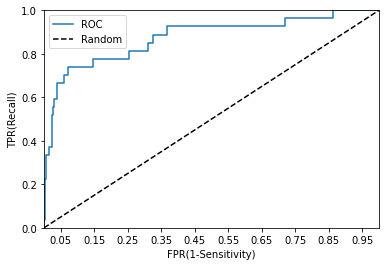

lda의 ROC AUC값: 0.8741


In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(MDA_UO_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(MDA_UO_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(MDA_UO_y_test, lda_clf.predict_proba(MDA_UO_x_test)[:,1])
pred_proba = lda_clf.predict_proba(MDA_UO_x_test)[:,1]
roc_score = roc_auc_score(MDA_UO_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


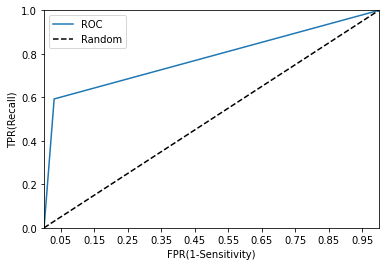

lda의 ROC AUC값: 0.7812


In [43]:
roc_curve_plot(MDA_UO_y_test, lda_clf.predict(MDA_UO_x_test))
roc_score = roc_auc_score(MDA_UO_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

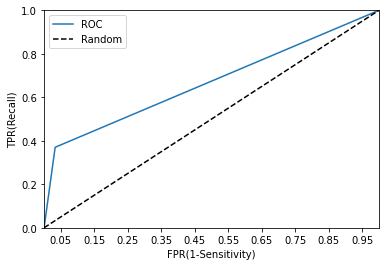

dt ROC AUC값: 0.6686


In [44]:
roc_curve_plot(MDA_UO_y_test, dt_clf.predict_proba(MDA_UO_x_test)[:,1])
pred_proba = dt_clf.predict_proba(MDA_UO_x_test)[:,1]
roc_score = roc_auc_score(MDA_UO_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


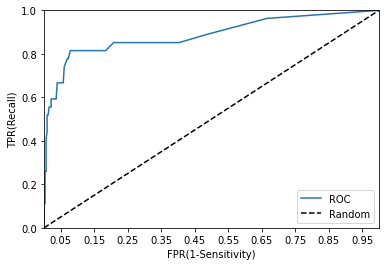

rf ROC AUC값: 0.8869


In [45]:
roc_curve_plot(MDA_UO_y_test, rf_clf.predict_proba(MDA_UO_x_test)[:,1])
pred_proba = rf_clf.predict_proba(MDA_UO_x_test)[:,1]
roc_score = roc_auc_score(MDA_UO_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

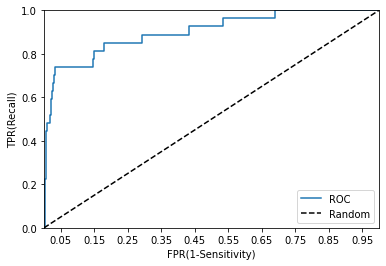

lr ROC AUC값: 0.9014


In [46]:
roc_curve_plot(MDA_UO_y_test, lr_clf.predict_proba(MDA_UO_x_test)[:,1])
pred_proba = lr_clf.predict_proba(MDA_UO_x_test)[:,1]
roc_score = roc_auc_score(MDA_UO_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

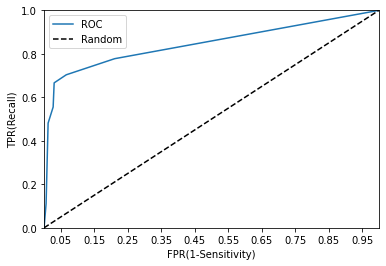

knn ROC AUC값: 0.8451


In [47]:
roc_curve_plot(MDA_UO_y_test, knn_clf.predict_proba(MDA_UO_x_test)[:,1])
pred_proba = knn_clf.predict_proba(MDA_UO_x_test)[:,1]
roc_score = roc_auc_score(MDA_UO_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))